In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import resample, shuffle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.metrics import log_loss

np.random.seed(42)
random_state=42

**Reading both seperate csv files**

In [124]:
dataTrain = pd.read_csv('train.csv')
dataTrain.head(10)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [125]:
dataTest = pd.read_csv('test.csv')
dataTest.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


*cleaning dataset*

In [126]:
def clean_dataset(df, name="Data", columns=None, inplace=False):

    if not inplace:
        df = df.copy()

    df.drop(df.columns[[0, 1]], axis=1, inplace=True)

    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    before = df.shape[0]

    if columns:
        df.dropna(subset=columns, inplace=True)
    else:
        df.dropna(inplace=True)

    after = df.shape[0]
    removed = before - after

    print(f"{name}: Removed {removed} row(s) with missing or blank fields.")
    return df

dataTrain = clean_dataset(dataTrain, name="dataTrain")
dataTest = clean_dataset(dataTest, name="dataTest")


dataTrain: Removed 310 row(s) with missing or blank fields.
dataTest: Removed 83 row(s) with missing or blank fields.


***Counting dataset so we understand if it is imbalanced or not***

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


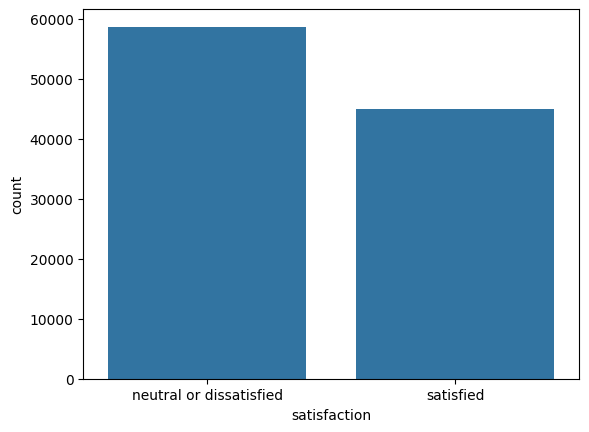

In [127]:
sns.countplot(x='satisfaction', data=dataTrain)
print(dataTrain['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64


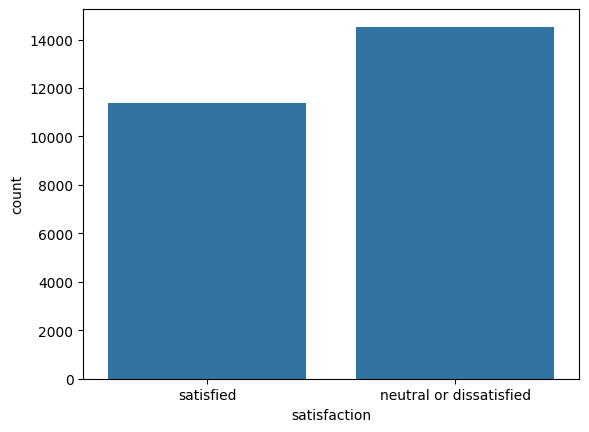

In [128]:
sns.countplot(x='satisfaction', data=dataTest)
print(dataTest['satisfaction'].value_counts())

In [129]:
hot_encoded_columns = ['Class']
dataTrain = pd.get_dummies(dataTrain, columns=hot_encoded_columns, drop_first=True, dtype=int)
dataTest = pd.get_dummies(dataTest, columns=hot_encoded_columns, drop_first=True, dtype=int)

#binary categories, so we transform them to 0 and 1
label_encoded_columns = ['Gender','Customer Type','Type of Travel']
label_encoders = {}

for col in label_encoded_columns:
    le = LabelEncoder()
    dataTrain[col] = le.fit_transform(dataTrain[col])
    dataTest[col] = le.transform(dataTest[col])  # Use transform on test data
    label_encoders[col] = le

# Set output "dissatisfied" to 0 and "sattisfied" to 1
print(dataTrain['satisfaction'].unique())

dataTrain['satisfaction'] = dataTrain['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

dataTest['satisfaction'] = dataTest['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

print(dataTrain['satisfaction'].value_counts())  # After mapping

dataTrain.head(10)

['neutral or dissatisfied' 'satisfied']
satisfaction
0    58697
1    44897
Name: count, dtype: int64


,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0
5,0,0,26,1,1180,3,4,2,1,1,...,4,4,4,4,1,0,0.0,0,1,0
6,1,0,47,1,1276,2,4,2,3,2,...,3,4,3,5,2,9,23.0,0,1,0
7,0,0,52,0,2035,4,3,4,4,5,...,5,5,4,5,4,4,0.0,1,0,0
8,0,0,41,0,853,1,2,2,2,4,...,2,1,4,1,2,0,0.0,0,0,0
9,1,1,20,0,1061,3,3,3,4,2,...,3,4,4,3,2,0,0.0,0,1,0


**Splitting data into test and train**

In [130]:
X_train = dataTrain.drop(columns=['satisfaction'])
y_train = dataTrain['satisfaction']


X_test = dataTest.drop(columns=['satisfaction'])
y_test = dataTest['satisfaction']

**Balancing dataset**

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X, y)


***Putting each function in its a code block to make the code easier to read and follow***

In [132]:
def make_predictions(rf_model, X_test):
    y_pred = rf_model.predict(X_test)
    y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
    return y_pred, y_pred_prob

def calculate_metrics(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(report).transpose())
    print(f"ROC AUC Score: {roc_auc:.4f}")
    return accuracy, report, roc_auc, conf_matrix

def plot_confusion_matrix(cm, classes):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


def plot_feature_importances(rf_model, X_train):
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print("Top 10 Feature Importances:")
    print(feature_importances.head(10))
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
    plt.title('Top 10 Feature Importances')
    plt.show()

def plot_roc_curve(y_test, y_pred_prob, roc_auc):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def print_classification_report(accuracy, report):

    print("Classification Accuracy:")
    print(f"{accuracy:.2f}")
    print("\nClassification Report:")
    print(report)

def plot_log_loss_over_iterations(X_train, y_train, X_test, y_test, iterations=10):
    losses = []

    for i in range(iterations):

        rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
        rf_model.fit(X_train, y_train)


        y_pred_prob = rf_model.predict_proba(X_test)

        loss = log_loss(y_test, y_pred_prob)
        losses.append(loss)

    plt.plot(range(1, iterations + 1), losses, marker='o', linestyle='-', color='b')
    plt.title('Log Loss over Multiple Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Log Loss')
    plt.grid(True)
    plt.show()

Accuracy: 0.9549
Classification Report:
              precision    recall  f1-score       support
0              0.950617  0.969920  0.960172  14528.000000
1              0.960524  0.935592  0.947894  11365.000000
accuracy       0.954853  0.954853  0.954853      0.954853
macro avg      0.955571  0.952756  0.954033  25893.000000
weighted avg   0.954966  0.954853  0.954783  25893.000000
ROC AUC Score: 0.9883


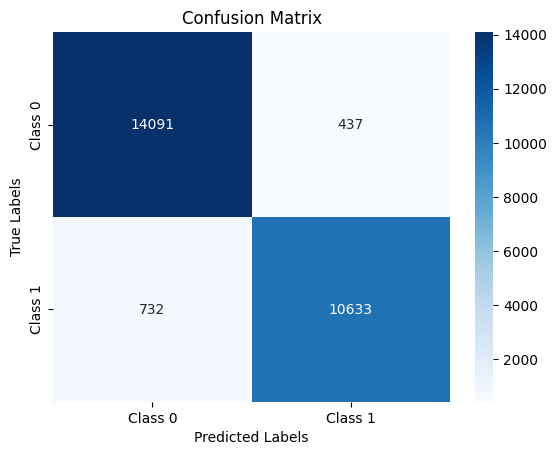

Top 10 Feature Importances:
                   Feature  Importance
10         Online boarding    0.191357
5    Inflight wifi service    0.130736
3           Type of Travel    0.103450
12  Inflight entertainment    0.078502
21               Class_Eco    0.060222
13        On-board service    0.044193
4          Flight Distance    0.043532
7   Ease of Online booking    0.041021
1            Customer Type    0.039167
2                      Age    0.035511


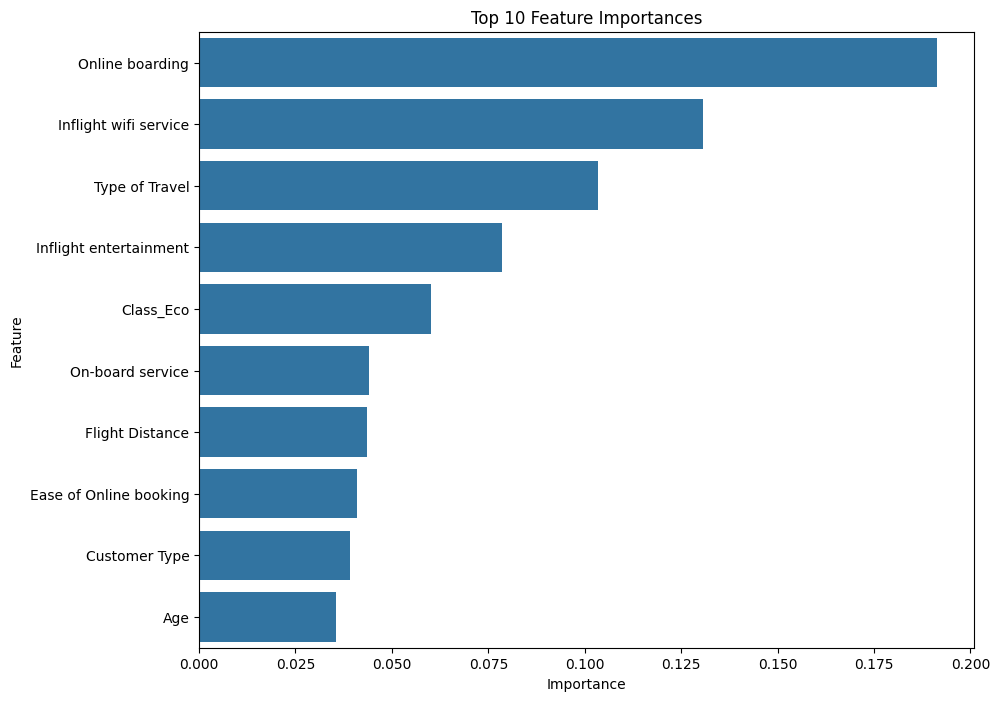

Classification Accuracy:
0.95

Classification Report:
{'0': {'precision': 0.9506172839506173, 'recall': 0.969920154185022, 'f1-score': 0.9601717147626997, 'support': 14528.0}, '1': {'precision': 0.9605239385727191, 'recall': 0.9355917289925209, 'f1-score': 0.9478939157566303, 'support': 11365.0}, 'accuracy': 0.95485266288186, 'macro avg': {'precision': 0.9555706112616682, 'recall': 0.9527559415887714, 'f1-score': 0.954032815259665, 'support': 25893.0}, 'weighted avg': {'precision': 0.954965529800082, 'recall': 0.95485266288186, 'f1-score': 0.9547827221506433, 'support': 25893.0}}


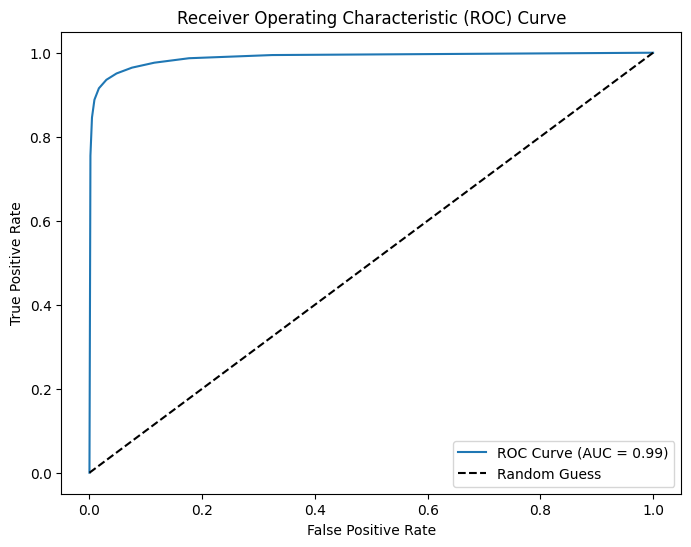

Log Loss: 0.2301


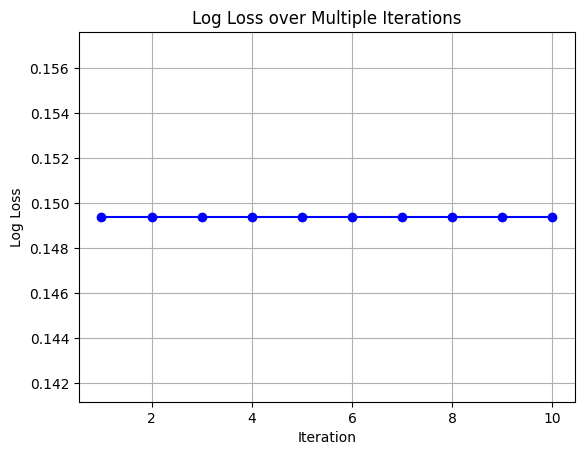

In [142]:
def train_random_forest(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=10,random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model
rf_model = train_random_forest(X_train_res, y_train_res)
y_pred, y_pred_prob = make_predictions(rf_model, X_test)
accuracy, report, roc_auc, conf_matrix = calculate_metrics(y_test, y_pred, y_pred_prob)
class_names = ['Class 0', 'Class 1']
plot_confusion_matrix(conf_matrix, class_names)
plot_feature_importances(rf_model, X_train)
print_classification_report(accuracy, report)
plot_roc_curve(y_test, y_pred_prob, roc_auc)



loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss:.4f}")
plot_log_loss_over_iterations(X_train, y_train, X_test, y_test)
